# Propagación de ondas Alfvén en una dimensión

La rapidez del sonido está dada por $$ v_s^2 = \frac{\Gamma P_0\left( x \right)}{\rho_0 \left( x \right)}$$ donde la presión $P_0 \left( x \right)$ constituye $$ P_0 \left(x \right) = n_e \left( x \right)  T_0 \left( 1 - \frac{x^2}{a^2} \right) $$, $T_0$ es la temperatura del núcleo que ronda los 85$\, \text{eV}$ y $ \rho_0$ es la densidad másica de plasma  expresada como $$ \rho_0 \left( x \right) = n_i  \cdot m_i + n_e \cdot m_e = n_e \left( m_i + m_e \right) = n_e \left( x \right) \left( 1836.15 \, m_e + m_e \right) = 1837.15 \, m_e n_e \left( x \right) \approx 1837.15 \cdot 9.11 \times 10^{-31} \, \text{kg} \cdot 1.5 \times 10^{19} \, \text{m}^{-3} \approx 2.5 \times 10^{-8} \, \text{kg}$$ bajo las suposiciones: grado de ionización cercano al 100\%. Esto permite reescribir la rapidez del sonido como $$ v_s^2 = \frac{\Gamma \, n_e \left( x \right) T_0    }{1837.15 \,  m_e n_e \left( x \right)} \left( 1 - \frac{x^2}{a^2} \right) = \frac{\Gamma  T_0    }{1837.15 \,  m_e } \left( 1 - \frac{x^2}{a^2} \right)$$

La velocidad de alfvén en una dimensión es $$ v_A^2 = \frac{\boldsymbol{B_0}^2 \left( x \right)}{2 \rho_0 \left( x \right)}$$ donde $\boldsymbol{B_0}$ es el campo magnético dado por $$ \boldsymbol{B_0} \left( x \right)  = B_{0y} \left( x \right) \hat{e}_y + B_{0z} \left( x \right) \hat{e}_z  $$ Por tanto, la velocidad de Alfvén es $$ v_A^2 = \frac{\boldsymbol{B_0}^2 \left( x \right)}{2 \cdot 1837.15 \, m_e n_e \left( x \right)}$$
Las componentes del vector de onda son $$ k_{\parallel} = \frac{k_yB_{0y} + k_zB_0z}{B_0}  $$ y $$ k_{\perp} = \frac{k_yB_{0z} - k_zB_{0y}}{B_0} $$
Las soluciones de la relación de dispersión son
\begin{gather*}
\omega_A^2 = k^2_\parallel \left( x \right) v_A^2 \left( x \right)\\
\omega_S^2 = \frac{v_S^2 k^2_\parallel }{1+v_S^2/v_A^2 }
\end{gather*}


In [8]:
# librerías
from libstell import *
from scipy import constants #constantes física
import matplotlib.pyplot as plt       #Import matplotlib.pyplot for plotting
import matplotlib as mpl
from math import *                    #For some constants
import numpy as np                    #For Arrays
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}', r'\usepackage{siunitx}'] #for \text command
#from jupyterthemes import jtplot #estilo para los gráficos
#jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) #Visualizar los gráficos en modo oscuro


/home/ricardo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  # Remove the CWD from sys.path while we load stuff.


In [9]:
#Importar el archivo
v=libstell.read_vmec('/home/ricardo/Documentos/VMEC/OutputVMEC/pySTEL/salidasVMEC/Caso14_basado_en_13/wout_MEDUSACR_fixed.nc')

In [10]:
nu=32
nv=15*v['nfp']
ns=v['ns']
theta = np.ndarray((nu,1))
zeta = np.ndarray((nv,1))
for i in range(nu): theta[i]=2*pi*i/(nu-1)
for i in range(nv): zeta[i]=2*pi*i/(nv-1)
R=libstell.cfunct(theta,zeta,v['rmnc'],v['xm'],v['xn'])
Z=libstell.sfunct(theta,zeta,v['zmns'],v['xm'],v['xn'])
print(np.min(R[:,:,1]), np.max(R[:,:,1]))
print(np.max(R[:,:,1])-np.min(R[:,:,1]))
#plt.plot(R[:,:,1], Z[:,:,1])
#print(np.amin(R[:,0,1]), np.amax(R[:,0,1]))
#print(np.amax(R[:,0,1])-np.amin(R[:,0,1]))
#Campo neto
B=libstell.cfunct(theta,zeta,v['bmnc'],v['xm_nyq'],v['xn_nyq'])
B_1=libstell.sfunct(theta,zeta,v['bmnc'],v['xm_nyq'],v['xn_nyq'])
B_neto = np.sqrt(np.power(B,2) + np.power(B_1,2))

#Campo en el corte 0 grados toroidal
b_c = B[:,:,1]

#Función para calcular las componentes en el plano x z
def componentes_B(B_total,theta):
    B_cos=[]
    B_sen=[]
    contador_1 , contador_2 = B_total.shape
    for i in range(contador_1):
        for j in range(contador_2):
            b_x = B_total[i,j]*np.cos(theta[j])*np.cos(zeta[i])
            b_z = B_total[i,j]*np.sin(theta[j])
            B_cos.append(b_x.tolist())
            B_sen.append(b_z.tolist())
            
    B_x = np.reshape(np.array(B_cos), (contador_1, contador_2)) #reacomodar tamaño
    B_z = np.reshape(np.array(B_sen), (contador_1, contador_2))
    return B_x , B_z

#Tres componentes
#Opción 1
B_0x , B_0z = componentes_B(b_c, theta)
B_0y = np.sqrt(np.power(B_neto[:,:,0],2) - np.power(B_0x,2) - np.power(B_0z,2) )
#B_0y = np.where(np.isnan(B_0y), 0, B_0y) #quitar nan
#Opción 2
#B_0x , B_0z = componentes_B(b_c, theta)
#B_0y = B_1[:,:,0]
print(B_0y[1])
#print(B_0z[3])
#print(B_0x[3])
#print(B_1[3,:,0])
#print(B_neto[3,:,0])


#plot1= plt.pcolormesh(R[:,:,0],Z[:,:,0],B_1[:,:,0],cmap='jet',shading='gouraud')

0.030290226799319767 0.2720407432
0.24175051640068024
[0.03380182 0.03325201 0.03173699 0.02963431 0.02744138 0.02564008
 0.02436675 0.02299243 0.02111645 0.01973846 0.02008176 0.02216554
 0.02522123 0.0283146  0.03069997 0.03197271 0.03197271 0.03069997
 0.0283146  0.02522123 0.02216554 0.02008176 0.01973846 0.02111645
 0.02299243 0.02436675 0.02564008 0.02744138 0.02963431 0.03173699
 0.03325201 0.03380182]


/home/ricardo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in sqrt


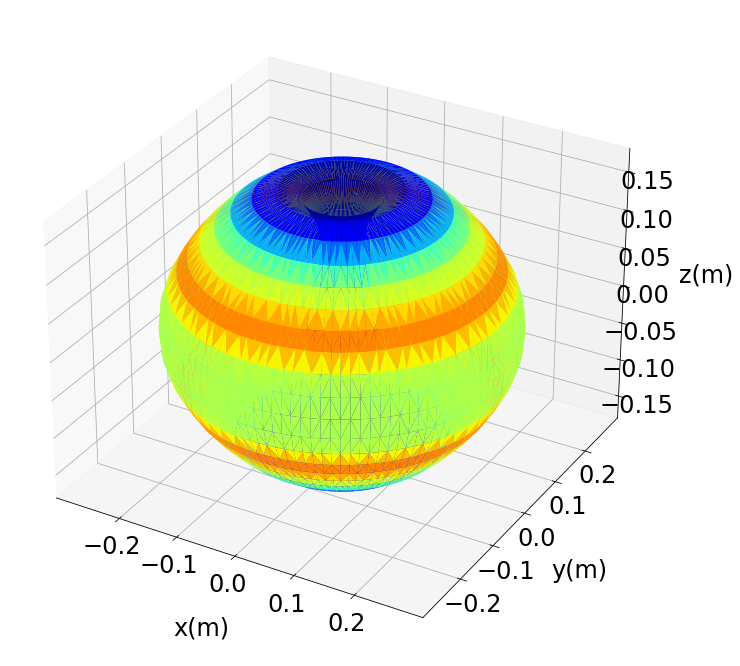

In [4]:
#Campo magnético total
from mayavi import *
#h=libstell.isotoro(R,Z,zeta,[48])
a=libstell.isotoro(R,Z,zeta,[98],B)


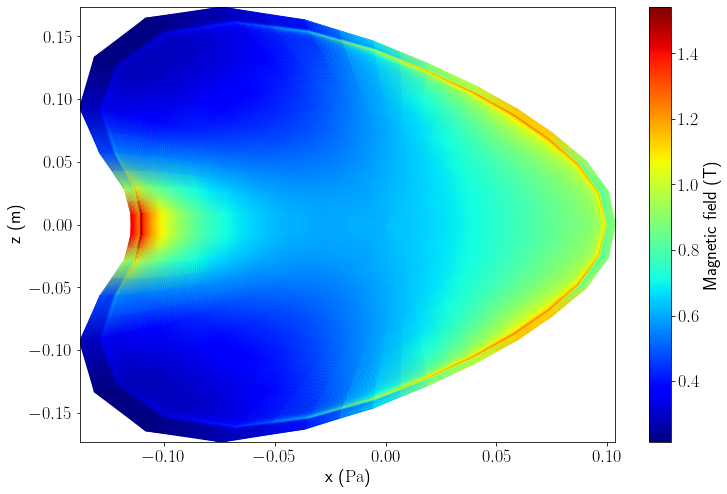

In [13]:

plot1, ejes = plt.subplots(figsize=(12,8)) #default (6,4)
R_0 = 0.16840254707127497 
graf = ejes.pcolormesh(R[:,:,0]-R_0,Z[:,:,0],B[:,:,0],cmap='jet',shading='gouraud')
ejes.set_xlabel(r'x (\si{\pascal})', fontsize=18)
ejes.set_ylabel('z (m)', fontsize=18)
ejes.tick_params(axis = 'both', which = 'major', labelsize = 18 )
cbarra=plot1.colorbar(graf)
cbarra.set_label('Magnetic field (T)', fontsize=18)
cbarra.ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.savefig('B_ingles.jpg', facecolor='white', transparent=False)

In [17]:
#Calcular las componentes del vector de onda

#Componentes de k
def componentes_k(k, B_total, theta, zeta, B_0z, B_0y):
    K_x = []
    K_y = []
    K_z = []
    a , f = B_total.shape # 99 en vez 120 - valores de zeta -
    contador_1 , contador_2 = a , len(theta)
    for i in range(contador_1):
        for j in range(contador_2):
            k_x = k*np.cos(theta[j])*np.cos(zeta[i])
            k_y = k*np.cos(theta[j])*np.sin(zeta[i])
            k_z = k*np.sin(theta[j])
            K_x.append(k_x.tolist())
            K_y.append(k_x.tolist())
            K_z.append(k_z.tolist())
    
    K_x = np.reshape(np.array(K_x), (a, f)) #reacomodar tamaño
    K_y = np.reshape(np.array(K_z), (a, f)) #reacomodar tamaño
    K_z = np.reshape(np.array(K_z), (a, f)) #reacomodar tamaño
    B_0 = np.sqrt(np.power(B_0y,2) + np.power(B_0z,2))
    k_par = (B_0y*K_y + B_0z*K_z)/B_0
    k_per = (B_0y*K_z - B_0z*K_y)/B_0
    return k_par, k_per

#Constantes y frecuencia de trabajo
#f = 2.45e9 #Hz
#c = constants.speed_of_light
#pi = constants.pi

#Magnitud de k
#k = 2*pi*f/c #m^-1

#K_par , K_per = componentes_k(k,b_c,theta,zeta, B_0z, B_0y)
#print(K_par.shape)


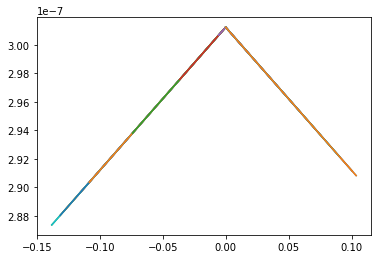

In [30]:
#Perfil de densidad de masa: se asume lineal según tesis de MEDUSA
def perfil_densidad_masa(n_promedio, n_intercepto,  R,R_0):
    #R_0 = 0.14
    x = R-R_0 # convertir al radio menor
    n_x = n_promedio*-np.absolute(x) + n_intercepto
    n_x_masa = n_x*1837.15*constants.m_e
    plt.plot(x,n_x_masa)
    #plt.xlabel("x (m)")
    #plt.ylabel("rho (kg/m^-3)")
    return n_x_masa

R_0 = 0.16840254707127497  #radio mayor
n_intercepto = 1.8e20 #densidad electrónica en el núcleo
n_promedio = 6.0e19 #densidad promedio
R_1 = R[:,:,1] #componentes de R para cada
N_x_masa = perfil_densidad_masa(n_promedio, n_intercepto, R_1,R_0)
#print(N_x_masa[0])



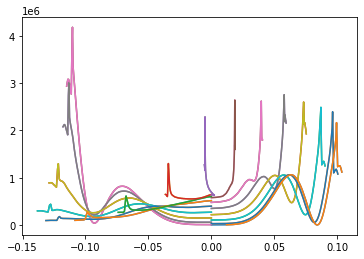

In [19]:
# Velocidad de Alfven
B_0 = np.sqrt(np.power(B_0y,2) + np.power(B_0z,2))
def velocidad_alfven(B_neto, N_x_masa):    
    return (np.power(B_neto,2))/(2*N_x_masa)
v_A =velocidad_alfven(B_0, N_x_masa)
x = R_1-R_0
#plt.plot(x[:,10],v_A[:,10])
plt.plot(x,v_A)

-0.1381123202719552


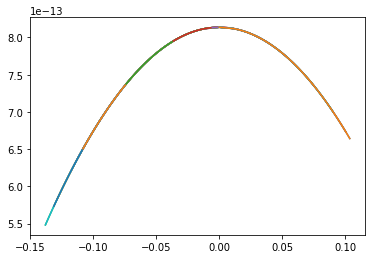

In [20]:
# Velocidad del sonido

def velocidad_sonido(Gamma, T_0, R):
    R_0 = 0.16840254707127497 
    a = 0.24175051640068024
    x = R-R_0 # convertir al radio menor
    factor = 1 - ((np.power(x,2))/(np.power(a,2)))
    V_s = ((Gamma*T_0)/(1837.15*constants.m_e))*factor
    print(np.min(x))
    return V_s
Gamma = 0.0000000000000000000001
T_0 = 1.3618500803e-17 # 85 ev en joules
v_S = np.absolute(velocidad_sonido(Gamma, T_0, R_1))
plt.plot(x,v_S)
    

/home/ricardo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/home/ricardo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/home/ricardo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.


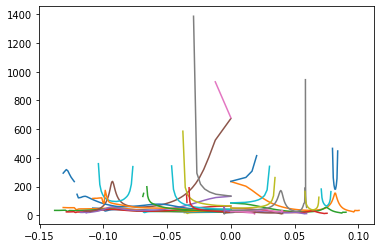

In [21]:
# Primera solución
def solucion_ED(K_par, v_A, v_S):
    x_1 = K_par*v_A
    x_2 = (v_S*(np.power(K_par,2)))/(1+(v_S/v_A))
    return x_1, x_2
omega_1 , omega_2 = solucion_ED(K_par, v_A,v_S)
R_1 = R[:,:,1] #componentes de R para cada
x = R_1-R_0
omega_de_trabajo = 2*pi*2.45e9 #rad/s
y = np.sqrt(omega_de_trabajo/omega_1)
plt.plot(x,y)

-0.2833488414473488


/home/ricardo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.
/home/ricardo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide
/home/ricardo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


(-0.11494629437607382, 0.10363819612872502)

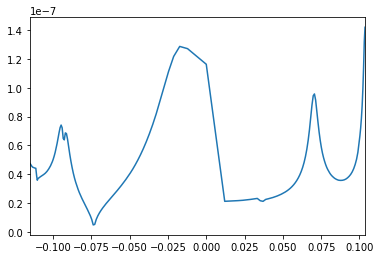

In [26]:
#Prueba con algunos valores de R
B_neto = np.sqrt(np.power(B,2) + np.power(B_1,2))
B_0x , B_0z = componentes_B(b_c, theta)
B_0y = np.sqrt(np.power(B_neto[:,:,0],2) - np.power(B_0x,2) - np.power(B_0z,2) )

#valores de K_par en una línea radial
#Constantes y frecuencia de trabajo
f = 147.45e9 #Hz
c = constants.speed_of_light
pi = constants.pi
#Magnitud de k
k = 2*pi*f/c #m^-1
K_par , K_per = componentes_k(k,b_c,theta,zeta, B_0z, B_0y)
K_par_radial=np.delete(np.append(K_par[:,15],K_par[:,1]), 0) # se elimina el índice repetido
#print(K_par_radial.shape)
#
R_1_radial =  np.flip(np.unique(np.append(R[:,15,1]-R_0,R[:,0,1]-R_0)))
N_x_masa_radial = perfil_densidad_masa(n_promedio, n_intercepto, R_1_radial)
#
B_0 = np.sqrt(np.power(B_0y,2) + np.power(B_0z,2))
B_0_radial = np.delete(np.append(B_0[:,15],B_0[:,1]), 0)
v_A =velocidad_alfven(B_0_radial, N_x_masa_radial)
#
v_S = np.absolute(velocidad_sonido(Gamma, T_0, R_1_radial))
#
omega_1 , omega_2 = solucion_ED(K_par_radial, v_A,v_S)
#Constantes
m_i = constants.m_p
carga = constants.e
omega_de_trabajo = 2*pi*f #rad/s
#
omega_ion = carga*B_0_radial/m_i #rad/s
#omega = np.linspace(np.amin(omega_1), np.amax(omega_1), num = omega_1.shape[0])
y = np.sqrt(omega_de_trabajo/omega_2)
y_1 = np.sqrt(omega_1/omega_ion)
y_2 = np.sqrt(omega_2/omega_ion)
#plt.plot(np.transpose(R_1_radial),y_1)
#plt.plot(np.transpose(R_1_radial),B_0_radial)
plt.plot(np.transpose(R_1_radial),y_2)
#plt.plot(np.transpose(R_1_radial),y)
plt.xlim([np.amin(R_1_radial), np.amax(R_1_radial)])
#plt.xlim([0, np.amax(R_1_radial)])
#plt.ylim([0, 20])


[ 0.         -0.01221835 -0.01733388 -0.02127735 -0.02461238 -0.02755758
 -0.03022521 -0.03268184 -0.03497108 -0.03711309 -0.03913796 -0.0410623
 -0.04290057 -0.04466265 -0.04635752 -0.04799203 -0.04957214 -0.05109724
 -0.05257427 -0.05400683 -0.05539918 -0.05675476 -0.05807629 -0.05936592
 -0.06062566 -0.06185531 -0.0630564  -0.06423034 -0.06537793 -0.06650273
 -0.06760551 -0.06868729 -0.06974831 -0.07079014 -0.07181268 -0.07281666
 -0.07380031 -0.07476814 -0.07572019 -0.07665701 -0.07757692 -0.07848323
 -0.07937587 -0.08025526 -0.08111778 -0.08196849 -0.08280755 -0.08363531
 -0.08444763 -0.08524947 -0.08604113 -0.08682288 -0.08759122 -0.08835001
 -0.08909949 -0.08984004 -0.09056817 -0.09128728 -0.09199759 -0.09269969
 -0.09339239 -0.09407696 -0.09475357 -0.09542265 -0.09608241 -0.09673422
 -0.09737823 -0.09801499 -0.09864458 -0.09926732 -0.09988329 -0.10049271
 -0.10109494 -0.10169026 -0.10227871 -0.1028604  -0.1034359  -0.10400522
 -0.10456838 -0.10512526 -0.10567576 -0.10621943 -0.

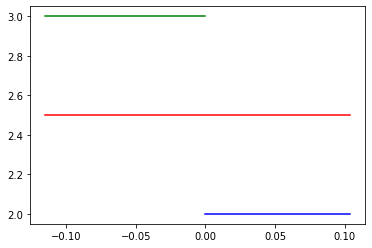

In [31]:

y1 = 2*np.ones(99)
y2 = 3*np.ones(99)
y3 = 2.5*np.ones(197)
plt.plot(R[:,0,1]-R_0,y1, c='b')
plt.plot(R[:,15,1]-R_0,y2, c= 'g')
R_verdadero = np.unique(np.append(R[:,15,1]-R_0,R[:,0,1]-R_0)) #valores de R en sola línea
R_1211 = np.append(R[:,15,1]-R_0,R[:,0,1]-R_0)
print(R_1211)
plt.plot(R_verdadero,y3, c= 'r')
